In [1]:
import torch
from torch import utils
from torchvision import datasets, transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot_mnist(images, shape):
    fig = plt.figure(figsize=shape[::-1], dpi=80)
    for j in range(1, len(images) + 1):
        ax = fig.add_subplot(shape[0], shape[1], j)
        ax.matshow(images[j - 1][0], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

In [3]:
path='./MNIST_data'

#### Получаем сырые данные - объекты PIL Image с диапазоном значений [0, 255]

In [52]:
PIL_data = datasets.MNIST(path, train=True, download=True, transform=transforms.ToTensor()).data

#### "Сваливаем" все данные в общую "кучу"

In [84]:
data_heap = torch.stack([sample.view(-1).float() / 255 for sample in PIL_data])

#### Вычисляем среднее значение и стандартное отклонение по всему набоу сырых данных

In [85]:
data_heap.mean()

tensor(0.1307)

In [86]:
data_heap.std()

tensor(0.3081)

#### Теперь эти значения можно использоватть для масштабирования набора данных

In [87]:
mnist_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,)),
           ])

In [88]:
train_data = datasets.MNIST(path, train=True, download=True, transform=mnist_transform)
test_data = datasets.MNIST(path, train=False, download=True, transform=mnist_transform)

#### Убеждаемся, что среднее значение пикселя по всему __тренировочному__ набору равно 0, а стандартное отклонение равно 1

In [109]:
train_means = [train_data[i][0].mean().item() for i in range(train_data.data.shape[0])]

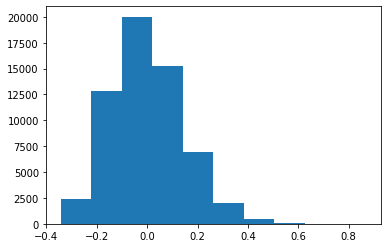

In [110]:
plt.hist(train_means);

In [111]:
np.mean(train_means)

-0.00012826573606384954

In [112]:
train_stds = [train_data[i][0].std().item() for i in range(train_data.data.shape[0])]

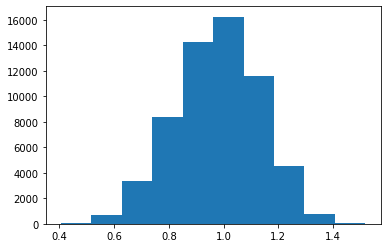

In [113]:
plt.hist(train_stds);

In [114]:
np.mean(train_stds)

0.978592300025622

#### Убеждаемся, что среднее значение пикселя по всему __тестовому__ набору равно 0, а стандартное отклонение равно 1

In [115]:
test_means = [test_data[i][0].mean().item() for i in range(test_data.data.shape[0])]

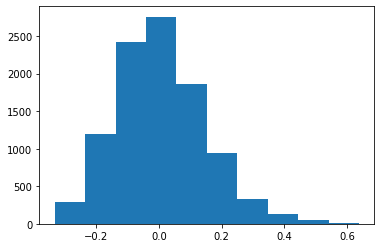

In [116]:
plt.hist(test_means);

In [117]:
np.mean(test_means)

0.005889679664829691

In [118]:
test_stds = [test_data[i][0].std().item() for i in range(test_data.data.shape[0])]

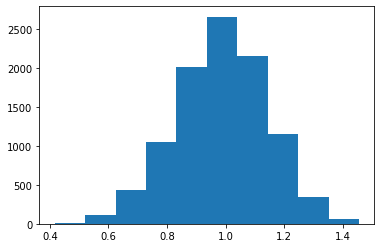

In [119]:
plt.hist(test_stds);

In [120]:
np.mean(test_stds)

0.9862208340346813

In [121]:
images = [train_data[i][0] for i in range(50)]

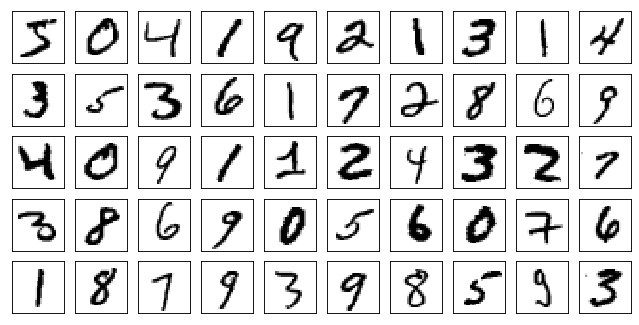

In [122]:
plot_mnist(images, (5, 10))

In [123]:
images[0][0].shape

torch.Size([28, 28])

In [124]:
train_loader = utils.data.DataLoader(train_data, batch_size=50, shuffle=True)

In [125]:
batch_x, batch_y = next(iter(train_loader))

In [126]:
batch_x.shape

torch.Size([50, 1, 28, 28])

In [127]:
batch_y

tensor([3, 7, 5, 9, 7, 3, 2, 8, 7, 8, 6, 2, 6, 1, 9, 2, 4, 8, 4, 4, 7, 6, 5, 1,
        2, 9, 7, 2, 7, 9, 2, 3, 7, 8, 7, 0, 8, 2, 9, 9, 5, 0, 4, 4, 9, 5, 2, 5,
        2, 3])